In [227]:
import requests
import json
import config
import matplotlib.pyplot as plt
import numpy as np

### Accessing API 

In [99]:
with requests.Session() as s:
    # logins from config file 
    SERVERROOT= config.SERVERROOT
    VAULT = config.VAULT
    
    url = '%s/%s/login' % (SERVERROOT, VAULT)

    # login data from config file 
    login_data = {
    "email": config.USERNAME,
    "password": config.PASSWORD
     }
    
    headers = {
    'Content-Type': 'application/json',
    }
    
    response = s.post(url, headers = headers, json = login_data).json()
    
    token =  response['token']
    
    headers = {
        'X-Token': token,
    }
    
    url = '%s/%s/artworks' % (SERVERROOT, VAULT)
    
    response = s.get(url, headers = headers, json = login_data).json()

### Retrieving Gender Information

In [100]:
response['aggregations'].keys()

dict_keys(['collection_inv_and_deposit', 'authors', 'gender', 'nationality', 'tree_domain_all', 'year', 'year_acq', 'mode_acq', 'tree_collection_deposit_all', 'tree_deposit_to_all', 'entry_mode', 'tree_deposit_place_all', 'withimage', 'tree_exposition_all', 'artistid', 'tree_internal_localization_all', 'tree_out_of_collection_all', 'tree_gcoll_folders_type_all', 'tree_loc_ext_all', 'tree_deposit_from_all'])

In [101]:
response['aggregations']['gender']

{'displayed_as': {'fr': 'Genre', 'en': 'Gender'},
 'pos': 21,
 'total': 4,
 'terms': [{'key': 'masculin', 'doc_count': 298541},
  {'key': 'féminin', 'doc_count': 48895},
  {'key': 'non renseigné', 'doc_count': 10864},
  {'key': 'groupe', 'doc_count': 6529}]}

In [102]:
male_num = response['aggregations']['gender']['terms'][0]['doc_count']
male_num

298541

In [103]:
female_num = response['aggregations']['gender']['terms'][1]['doc_count']
female_num

48895

In [104]:
unspecified = response['aggregations']['gender']['terms'][2]['doc_count']
unspecified

10864

In [105]:
group = response['aggregations']['gender']['terms'][3]['doc_count']
group

6529

In [106]:
response['totalCount']


379366

In [107]:
total = male_num + female_num + unspecified + group
total

364829

In [108]:
# total of gender values is not equal to total count of artworks provided by aggregations
total == response['totalCount']

False

### Ratios

In [162]:
# percentage of artworks by female artists out of all artworks
f = round(female_num/total*100)
print (f,'%')

13 %


In [163]:
# percentage of artworks by male artists out of all artworks
m = round(male_num/total*100)
print (m,'%')

82 %


In [164]:
# percentage of artworks by artists' groups out of all artworks
g = round(group/total*100)
print (g,'%')

2 %


In [166]:
# percentage of artworks by unspecified gender artists out of all artworks
u = round(unspecified/total*100)
print (u,'%')

3 %


In [117]:
# percentage of artworks by female artists out of artworks by males or female artists (excluding unspecified and group)
print (round(female_num/(female_num + male_num)*100),'%')

14 %


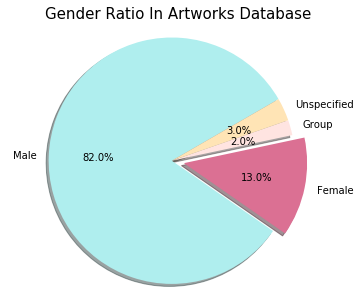

In [214]:
labels = 'Male', 'Female', 'Group', 'Unspecified'
gender = [m, f, g, u]
colors = ['#AFEEEE', '#DB7093', '#FFE4E1', '#FFE4B5']
explode = (0, 0.1, 0, 0)  


fig1, ax1 = plt.subplots(figsize=(6, 5))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=390, colors = colors)
plt.title('Gender Ratio In Artworks Database', fontsize=15)
ax1.axis('equal')  

plt.show()

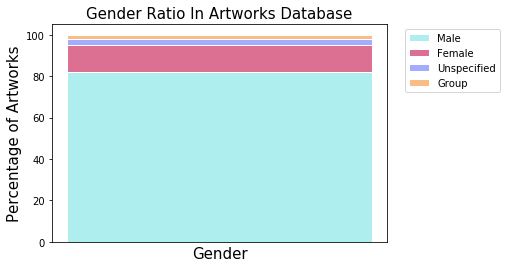

In [30]:

m = 82
f = 13
u = 3
g = 2

index = 1
plt.bar(index, m, color = '#AFEEEE', edgecolor = 'white', width=0.25, align='center')
plt.bar(index, f, bottom = m, color = '#DB7093', edgecolor = 'white', width=0.25, align='center')
plt.bar(index, u, bottom = m+f, color='#a3acff', edgecolor = 'white', width=0.25, align='center')
plt.bar(index, g, bottom = m+f+u, color= '#f9bc86', edgecolor = 'white', width=0.25, align='center')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Percentage of Artworks', fontsize=15)
plt.title('Gender Ratio In Artworks Database', fontsize=15)
plt.gca().legend(('Male','Female', 'Unspecified', 'Group'), bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks([])
plt.show()

### Groups

In [157]:
# filter 'groupe'
    url = '%s/%s/artworks?filters=gender:groupe' % (SERVERROOT, VAULT)
    
    headers = {
            'X-Token': token,
        }



    response = s.get(url, headers = headers, json = login_data).json()

In [158]:
    response.keys()

dict_keys(['startIndex', 'totalCount', 'filteredCount', 'itemsPerPage', 'aggregations', 'results'])

In [159]:
    # some group authors seem to have gender attribute as masculin or feminin
    response['aggregations']['gender']

{'displayed_as': {'fr': 'Genre', 'en': 'Gender'},
 'pos': 21,
 'total': 4,
 'terms': [{'key': 'groupe', 'doc_count': 6529},
  {'key': 'masculin', 'doc_count': 382},
  {'key': 'féminin', 'doc_count': 104},
  {'key': 'non renseigné', 'doc_count': 10}]}

In [178]:
url = '%s/%s/artworks?size=0&term=gender&term_from=0&term_order=count:desc&term_size=12' % (SERVERROOT, VAULT)

In [179]:
responseB = s.get(url, headers = headers, json = login_data).json()

In [180]:
responseB

{'startIndex': 0,
 'totalCount': 379366,
 'filteredCount': 379366,
 'itemsPerPage': 0,
 'aggregations': {'gender': {'displayed_as': {'fr': 'Genre', 'en': 'Gender'},
   'pos': 21,
   'total': 4,
   'terms': [{'key': 'masculin', 'doc_count': 298541},
    {'key': 'féminin', 'doc_count': 48895},
    {'key': 'non renseigné', 'doc_count': 10864},
    {'key': 'groupe', 'doc_count': 6529}]}},
 'results': []}